# Ted Data Analysis
![](https://ted-talks.online/wp-content/uploads/2017/09/Tedtalks-на-русском.png)

# DataSets
These datasets contain information about all audio-video recordings of TED Talks uploaded to the official TED.com website until September 21st, 2017. The TED main dataset contains information about all talks including number of views, number of comments, descriptions, speakers and titles. The TED transcripts dataset contains the transcripts for all talks available on TED.com.
> **ted_main.csv**   
> Data about TED talks on the TED.com website until September 21st, 2017


# Data Features
* **name**: The official name of the TED Talk. Includes the title and the speaker.
* **title**: The title of the talk
* **description**: A blurb of what the talk is about.
* **main_speaker**: The first named speaker of the talk.
* **speaker_occupation**: The occupation of the main speaker.
* **num_speaker**: The number of speakers in the talk.
* **duration**: The duration of the talk in seconds.
* **event**: The TED/TEDx event where the talk took place.
* **film_date**: The Unix timestamp of the filming.
* **published_date**: The Unix timestamp for the publication of the talk on TED.com
* **comments**: The number of first level comments made on the talk.
* **tags**: The themes associated with the talk.
* **languages**: The number of languages in which the talk is available.
* **ratings**: A stringified dictionary of the various ratings given to the talk (inspiring, fascinating, jaw dropping, etc.)
* **related_talks**: A list of dictionaries of recommended talks to watch next.
* **url**: The URL of the talk.
* **views**: The number of views on the talk. 

In [125]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [126]:
df = pd.read_csv('./Data/ted_main.csv')
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [3]:
# Redefine the features order based on default
df = df[['name', 
         'title', 
         'description', 
         'main_speaker', 
         'speaker_occupation', 
         'num_speaker', 
         'duration', 
         'event', 
         'film_date', 
         'published_date', 
         'comments', 
         'tags', 
         'languages', 
         'ratings', 
         'related_talks', 
         'url', 
         'views']]
df.head()

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,1140825600,1151367060,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,1140825600,1151367060,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,1286,TED2006,1140739200,1151367060,124,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,Majora Carter: Greening the ghetto,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,1116,TED2006,1140912000,1151367060,200,"['MacArthur grant', 'activism', 'business', 'c...",35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,Global health expert; data visionary,1,1190,TED2006,1140566400,1151440680,593,"['Africa', 'Asia', 'Google', 'demo', 'economic...",48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
name                  2550 non-null object
title                 2550 non-null object
description           2550 non-null object
main_speaker          2550 non-null object
speaker_occupation    2544 non-null object
num_speaker           2550 non-null int64
duration              2550 non-null int64
event                 2550 non-null object
film_date             2550 non-null int64
published_date        2550 non-null int64
comments              2550 non-null int64
tags                  2550 non-null object
languages             2550 non-null int64
ratings               2550 non-null object
related_talks         2550 non-null object
url                   2550 non-null object
views                 2550 non-null int64
dtypes: int64(7), object(10)
memory usage: 338.8+ KB


In [5]:
df.columns

Index(['name', 'title', 'description', 'main_speaker', 'speaker_occupation',
       'num_speaker', 'duration', 'event', 'film_date', 'published_date',
       'comments', 'tags', 'languages', 'ratings', 'related_talks', 'url',
       'views'],
      dtype='object')

The TED datasets have 2550 TED talks and for each talk have 17 features.

In [6]:
print('Total TED DataSets: {}'.format(df.shape[0]))
print('Total TED Features: {}'.format(df.shape[1]))

Total TED DataSets: 2550
Total TED Features: 17


# Most popular 15 TED talks.

In [7]:
pop_ted = df[['title', 'main_speaker','views']]
pop_ted = pop_ted.sort_values(by='views', ascending=False)[:15].reset_index(drop=True)
pop_ted

,title,main_speaker,views
0,Do schools kill creativity?,Ken Robinson,47227110
1,Your body language may shape who you are,Amy Cuddy,43155405
2,How great leaders inspire action,Simon Sinek,34309432
3,The power of vulnerability,Brené Brown,31168150
4,10 things you didn't know about orgasm,Mary Roach,22270883
5,How to speak so that people want to listen,Julian Treasure,21594632
6,My stroke of insight,Jill Bolte Taylor,21190883
7,Why we do what we do,Tony Robbins,20685401
8,This is what happens when you reply to spam email,James Veitch,20475972
9,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,19787465


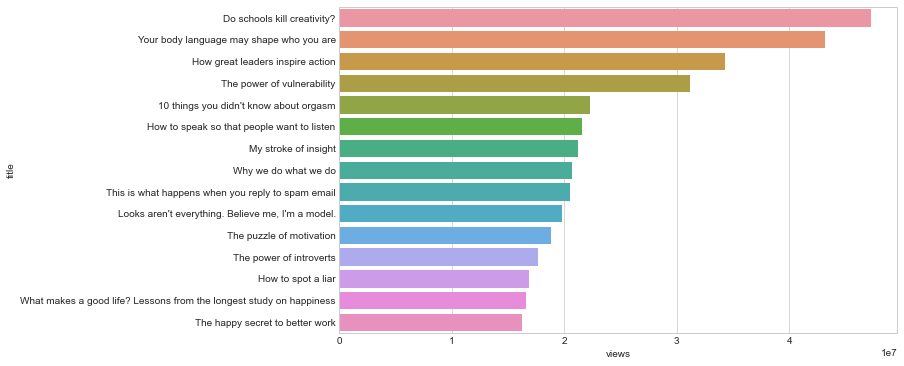

In [8]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.barplot(x=pop_ted['views'], y=pop_ted['title']);

In [30]:
df['views'].describe()

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

# Most Popular 10 Speakers.

In [9]:
# pandas.Series.value_counts

pop_speakers = df['main_speaker'].value_counts()[:10]
pop_10_speakers = pd.DataFrame({
    'main_speaker': pop_speakers.index,
    'show_times': pop_speakers.values
})
pop_10_speakers

,main_speaker,show_times
0,Hans Rosling,9
1,Juan Enriquez,7
2,Marco Tempest,6
3,Rives,6
4,Nicholas Negroponte,5
5,Julian Treasure,5
6,Jacqueline Novogratz,5
7,Bill Gates,5
8,Dan Ariely,5
9,Clay Shirky,5


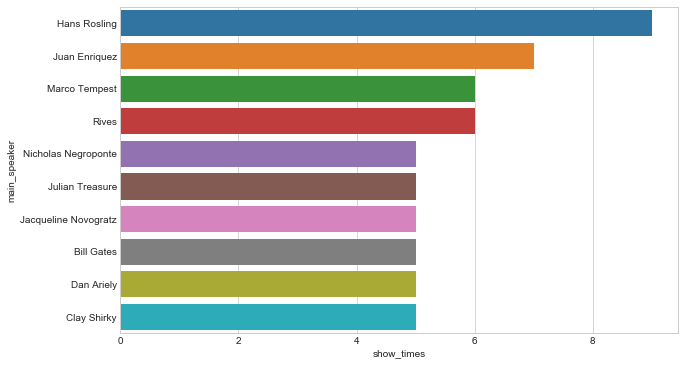

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(x=pop_10_speakers['show_times'], y=pop_10_speakers['main_speaker']);

# Comments & Views Relationship

In [11]:
cvr = df[['title', 'comments', 'views']]
cvr.head()

,title,comments,views
0,Do schools kill creativity?,4553,47227110
1,Averting the climate crisis,265,3200520
2,Simplicity sells,124,1636292
3,Greening the ghetto,200,1697550
4,The best stats you've ever seen,593,12005869


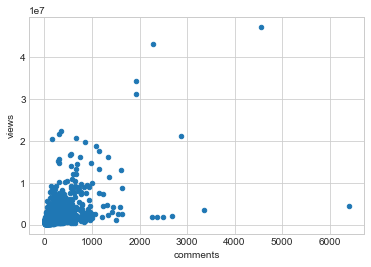

In [16]:
plt.figure(figsize=(10,6))
cvr.plot.scatter('comments', 'views');

In [61]:
cvr.corr()
# Correlation > 0.5 mean medium strong positive relation between comments & views.

,comments,views
comments,1.000000,0.530939
views,0.530939,1.000000


# TED Top 10 Speaker Occupation

In [53]:
occupation_df = df['speaker_occupation'].value_counts()[:10]
occupation_df

Writer          45
Designer        34
Artist          34
Journalist      33
Entrepreneur    31
Architect       30
Inventor        27
Psychologist    26
Photographer    25
Filmmaker       21
Name: speaker_occupation, dtype: int64

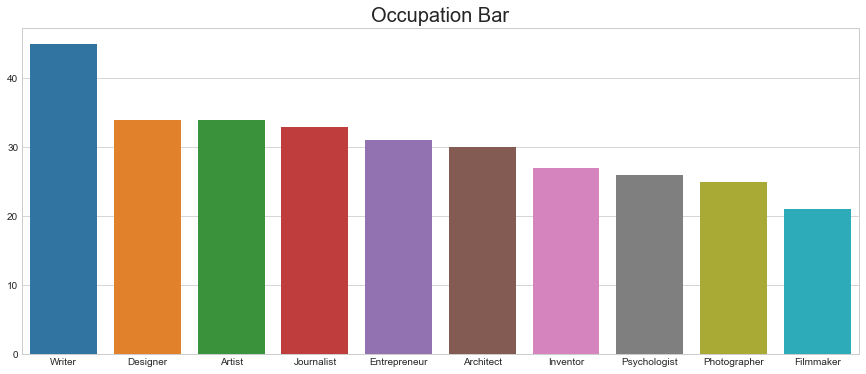

In [60]:
plt.figure(figsize=(15,6))
sns.barplot(x=occupation_df.index, y=occupation_df.values);
plt.title('Occupation Bar', fontsize=20)

# TED Date Analysis

In [67]:
# timestamp to readable time transfer function
def unix_data_to_normal(time_stamp):
    return datetime.datetime.fromtimestamp(time_stamp).strftime('%Y/%m/%d')

df_1 = df
# transfer the film_date and published_date
df_1['film_date'] = df_1['film_date'].apply(unix_data_to_normal)
# df['film_date'] = df['film_date'].map(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y/%m/%d'))

df_1['published_date'] = df_1['published_date'].apply(unix_data_to_normal)
# df['published_date'] = df['published_date'].map(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y/%m/%d'))

df_1[['film_date', 'published_date']].head()

,film_date,published_date
0,2006/02/24,2006/06/26
1,2006/02/24,2006/06/26
2,2006/02/23,2006/06/26
3,2006/02/25,2006/06/26
4,2006/02/21,2006/06/27


In [101]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

df_month = df_1['film_date'].apply(lambda date: date.split('/')[1]).value_counts()
df_month = pd.DataFrame(df_month).reset_index()
df_month.columns = ['month', 'num_talks']
df_month['month'] = df_month['month'].apply(lambda date_int: month_order[int(date_int)-1])
df_month

,month,num_talks
0,Feb,645
1,Mar,354
2,Jun,271
3,Jul,250
4,Nov,240
5,Oct,205
6,Apr,172
7,May,123
8,Sep,114
9,Dec,111


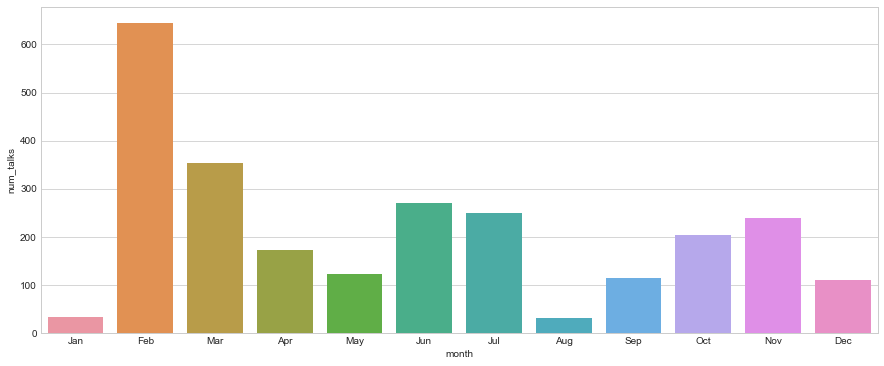

In [104]:
plt.figure(figsize=(15,6))
sns.barplot(x='month', y='num_talks', data=df_month, order=month_order)

# TED Themes Analysis

In [308]:
import ast

theme_list = []
tag_list = df['tags'].apply(lambda x: ast.literal_eval(x))

for item in tag_list:
    for theme in item:
        theme_list.append(theme)
        
df_theme = pd.Series(theme_list)
print('Totally have {} different categories of TED talks'.format(df_theme.value_counts().shape[0]))

Totally have 416 different categories of TED talks


In [309]:
top_10_theme = pd.DataFrame(df_theme.value_counts()[:10]).reset_index()
top_10_theme.columns = [['Theme', 'Talks']]
top_10_theme

,Theme,Talks
0,technology,727
1,science,567
2,global issues,501
3,culture,486
4,TEDx,450
5,design,418
6,business,348
7,entertainment,299
8,health,236
9,innovation,229


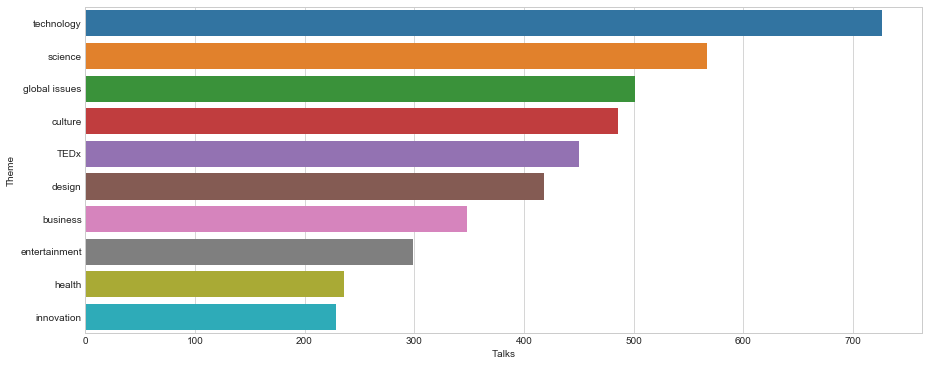

In [310]:
plt.figure(figsize=(15,6))
sns.barplot(x='Talks', y='Theme', data=top_10_theme)

In [311]:
year_range = list(range(2010, 2018))
pop_theme = top_5_theme['Theme'].values

def get_count_of_year(year, topic):
    return df_1[ (df_1['film_date'].map(lambda x: int(x.split('/')[0])) == year) & (df_1['tags'].map(lambda x: topic in x))].shape[0]

year_topic = pd.DataFrame([[get_count_of_year(year, theme) for theme in pop_theme] for year in year_range], 
                          columns=pop_theme,
                         index=year_range)
year_topic

,technology,science,global issues,culture,TEDx,design,business,entertainment,health,innovation
2010,66,68,68,67,59,45,53,38,21,7
2011,88,77,55,78,96,56,25,36,15,11
2012,75,64,56,54,88,33,31,25,27,29
2013,64,35,40,51,48,33,34,22,25,16
2014,41,29,31,17,35,15,21,7,24,11
2015,51,55,34,17,43,25,15,10,33,39
2016,73,56,39,14,58,32,35,11,32,75
2017,26,15,16,2,9,13,7,4,12,17


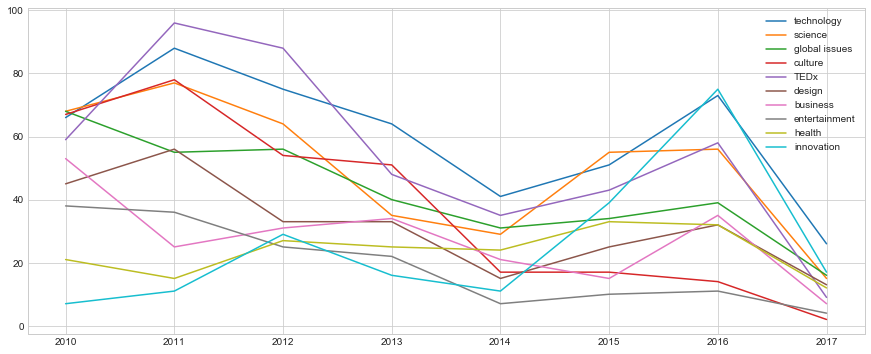

In [312]:
plt.figure(figsize=(15,6))
for theme in pop_theme:
    plt.plot(year_range, year_topic[theme])
plt.legend()

# Most popular theme in 2017

In [313]:
df_2017 = df_1[ (df_1['film_date'].map(lambda x: int(x.split('/')[0])) == 2017)]['tags'].reset_index(drop=True)

theme_2017 = []

for l in df_2017:
    for item in l:
        theme_2017.append(item)

theme_2017 = pd.Series(theme_2017).value_counts()[:5]
theme_2017

society          40
humanity         31
social change    29
technology       26
communication    24
dtype: int64

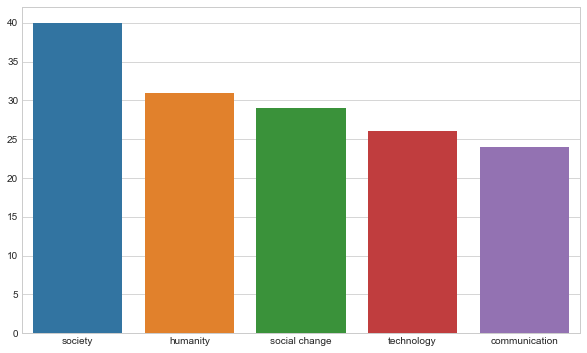

In [314]:
plt.figure(figsize=(10,6))
sns.barplot(x=theme_2017.index, y=theme_2017.values)

# The trend of TED

In [322]:
def get_total_views(year):
    return df_1[ (df_1['film_date'].map(lambda x: int(x.split('/')[0])) == year)]['views'].sum()

year_views = pd.DataFrame(
    [get_total_views(year) for year in year_range], 
                          columns=['Total Views'], index=year_range)

year_views

,Total Views
2010,385986488
2011,402612073
2012,489409270
2013,588156490
2014,419639114
2015,460336245
2016,362907379
2017,112387752


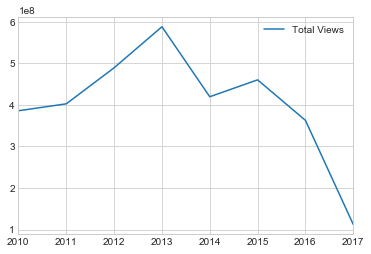

In [328]:
plt.figure(figsize=(10,10))
year_views.plot.line();